In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os
import imageio
import time
from statistics import mean
import nest_asyncio # It manages running of all coroutines, tasks, callbacks
nest_asyncio.apply() # To avoid RuntimeError: This event loop is already running

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
path = os.getcwd()

In [3]:
print(os.path.join(os.path.expanduser('~'), path))

/Users/sahilkhanna/Documents/Books/Fall'21/CS688/Assignment/Project


In [4]:
path = os.path.join(os.path.expanduser('~'), path)

In [5]:
df = pd.read_csv(path+"/pose-output.csv")

In [6]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,right_elbow__right_wrist,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee
0,Seated Jackknife,"[0.5418540835380554, 0.5442179441452026, 0.542...","[0.3002445101737976, 0.2985352575778961, 0.301...","[-0.012251616455614567, -0.014628192409873009,...","[0.5088052749633789, 0.5077652931213379, 0.508...","[0.3219769299030304, 0.3233363628387451, 0.320...","[-0.29006227850914, -0.3067556917667389, -0.29...","[0.5200956463813782, 0.5252318978309631, 0.518...","[0.43313315510749817, 0.43440017104148865, 0.4...","[0.023481255397200584, 0.027144629508256912, 0...",...,"[0.11870693790317313, 0.11504417686981344, 0.1...","[0.23017388752729162, 0.23315023161325266, 0.2...","[0.23029485638792568, 0.2349012585971055, 0.23...","[0.25909465412553867, 0.25427671811613684, 0.2...","[0.2202232930928984, 0.23576031068245906, 0.22...","[0.22126598815086604, 0.2349819752379838, 0.22...","[0.4208857583322643, 0.4212868096159516, 0.419...","[0.3301144223315916, 0.33715394861846365, 0.33...","[0.28414532412631166, 0.27733679368033176, 0.2...","[0.18430521790866844, 0.18859900430098123, 0.1..."
1,hanging leg raises_4,"[0.5782945156097412, 0.5766435265541077, 0.578...","[0.26492059230804443, 0.26829394698143005, 0.2...","[0.23363590240478516, 0.2346416413784027, 0.17...","[0.3990108072757721, 0.39986276626586914, 0.39...","[0.2629733383655548, 0.2652568817138672, 0.267...","[0.18077099323272705, 0.21373336017131805, 0.1...","[0.5760862231254578, 0.5784265398979187, 0.580...","[0.1357021927833557, 0.139947772026062, 0.1494...","[0.12392085790634155, 0.08857688307762146, -0....",...,"[0.11880247899494256, 0.1291723964508681, 0.32...","[0.4775859953217521, 0.4829440009292758, 0.471...","[0.4762283843144188, 0.4863127939909768, 0.468...","[0.31453877314059864, 0.3338588670057528, 0.66...","[0.11317155098857155, 0.10492151927640579, 0.1...","[0.18299163206838231, 0.17656986721931445, 0.2...","[0.9856315555843692, 0.9871689085149553, 1.023...","[0.9798523873545497, 0.9804505944097357, 0.993...","[0.7516544042639829, 0.7540601361998142, 0.830...","[0.7472285522275655, 0.742169358856643, 0.7560..."
2,lat pull-downs (3),"[0.3666636049747467, 0.36453235149383545, 0.36...","[0.42665767669677734, 0.4232560694217682, 0.42...","[-0.14651350677013397, -0.13161535561084747, -...","[0.5754898190498352, 0.5769296288490295, 0.581...","[0.42604580521583557, 0.42163991928100586, 0.4...","[-0.2312099039554596, -0.22043350338935852, -0...","[0.2667595446109772, 0.26817038655281067, 0.26...","[0.34889376163482666, 0.34703338146209717, 0.3...","[-0.09492386132478714, -0.055764149874448776, ...",...,"[0.1445199875146175, 0.13996502796851606, 0.14...","[0.8630867921448174, 0.9073103270419643, 0.864...","[0.8587081726814862, 0.8529404820465696, 0.779...","[0.27370898493244844, 0.2690174381122755, 0.27...","[0.1421424002897987, 0.13410199096563044, 0.16...","[0.21682445885979953, 0.19235556042657675, 0.2...","[1.155712507770099, 1.0760162102915327, 1.0347...","[1.1580924679022133, 1.1346880673895943, 1.153...","[0.8130495101279238, 0.7498257471886755, 0.732...","[0.782741881647475, 0.7561479803973564, 0.7768..."
3,The Deadlift,"[0.7406108379364014, 0.7419969439506531, 0.742...","[0.5564836859703064, 0.5566250681877136, 0.556...","[-0.38916176557540894, -0.3686125874519348, -0...","[0.6314489841461182, 0.6323789358139038, 0.632...","[0.5561099052429199, 0.557192862033844, 0.5597...","[-0.387429803609848, -0.36667054891586304, -0....","[0.7622431516647339, 0.7612311840057373, 0.761...","[0.7091829180717468, 0.7095293998718262, 0.709...","[-0.3936120569705963, -0.36398905515670776, -0...",...,"[0.14527527079152966, 0.138364031445145, 0.140...","[0.30632092476038536, 0.306

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         224 non-null    object
 1   xX_left_shoulder             224 non-null    object
 2   yY_left_shoulder             224 non-null    object
 3   zZ_left_shoulder             224 non-null    object
 4   xX_right_shoulder            224 non-null    object
 5   yY_right_shoulder            224 non-null    object
 6   zZ_right_shoulder            224 non-null    object
 7   xX_left_elbow                224 non-null    object
 8   yY_left_elbow                224 non-null    object
 9   zZ_left_elbow                224 non-null    object
 10  xX_right_elbow               224 non-null    object
 11  yY_right_elbow               224 non-null    object
 12  zZ_right_elbow               224 non-null    object
 13  xX_left_wrist                224 no

# Pre-processing

## Converting Strings into float

In [8]:
df_new = pd.DataFrame()
for i in range((len(df.columns[1:]))):
    col = df.columns[i+1]
    for j in col:
        df_new[col] = [eval(x) for x in df[col]]

In [9]:
df_new["name"] = df["name"]

# Visualization

In [10]:
from mpl_toolkits.mplot3d import Axes3D
r = 0 # Select the exercise name and it's visualition

def line_add(x1, y1, z1, x2, y2, z2):
    """given two points, returns a line that connects them"""
    l = x2 - x1
    m = y2 - y1
    n = z2 - z1
    xl = np.linspace(x1, x2, num=100)
    yl = (m/l)*(xl - x1) + y1
    zl = (n/l)*(xl - x1) + z1
    return xl, yl, zl

for i in range(len(df_new['xX_right_hip'][r])):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #plot all the points first
    ax.scatter(df_new["xX_right_shoulder"][r][i], df_new["zZ_right_shoulder"][r][i], -
               df_new["yY_right_shoulder"][r][i], c = 'red')
    ax.scatter(df_new["xX_left_shoulder"][r][i], df_new["zZ_left_shoulder"][r][i], -
               df_new["yY_left_shoulder"][r][i], c = 'red')
    #elbows
    ax.scatter(df_new["xX_right_elbow"][r][i], df_new["zZ_right_elbow"][r][i], -
               df_new["yY_right_elbow"][r][i], c='blue')
    ax.scatter(df_new["xX_left_elbow"][r][i], df_new["zZ_left_elbow"][r][i], -
               df_new["yY_left_elbow"][r][i], c='blue')
    #wrists
    ax.scatter(df_new["xX_right_wrist"][r][i], df_new["zZ_right_wrist"][r][i], -
               df_new["yY_right_wrist"][r][i], c='orange')
    ax.scatter(df_new["xX_left_wrist"][r][i], df_new["zZ_left_wrist"][r][i], -
               df_new["yY_left_wrist"][r][i], c='orange')
    #hip
    ax.scatter(df_new["xX_right_hip"][r][i], df_new["zZ_right_hip"][r][i], -
               df_new["yY_right_hip"][r][i], c='green')
    ax.scatter(df_new["xX_left_hip"][r][i], df_new["zZ_left_hip"][r][i], -
               df_new["yY_left_hip"][r][i], c='green')
    #knee
    ax.scatter(df_new["xX_right_knee"][r][i], df_new["zZ_right_knee"][r][i], -
               df_new["yY_right_knee"][r][i], c='black')
    ax.scatter(df_new["xX_left_knee"][r][i], df_new["zZ_left_knee"][r][i], -
               df_new["yY_left_knee"][r][i], c='black')
    #ankle
    ax.scatter(df_new["xX_right_ankle"][r][i], df_new["zZ_right_ankle"][r][i], -
               df_new["yY_right_ankle"][r][i], c='yellow')
    ax.scatter(df_new["xX_left_ankle"][r][i], df_new["zZ_left_ankle"][r][i], -
               df_new["yY_left_ankle"][r][i], c='yellow')

    #create various lines 
    #wrist to elbow
    a, b, c = line_add(df_new["xX_right_elbow"][r][i], df_new["zZ_right_elbow"][r][i], -
                       df_new["yY_right_elbow"][r][i], df_new["xX_right_wrist"][r][i], 
                       df_new["zZ_right_wrist"][r][i], -df_new["yY_right_wrist"][r][i])
    
    ax.plot3D(a, b, c, 'red')
    a, b, c = line_add(df_new["xX_left_elbow"][r][i], df_new["zZ_left_elbow"][r][i], 
                       -df_new["yY_left_elbow"][r][i], df_new["xX_left_wrist"][r][i], 
                       df_new["zZ_left_wrist"][r][i], -df_new["yY_left_wrist"][r][i])
    
    ax.plot3D(a, b, c, 'red')

    #elbow to shoulder
    a, b, c = line_add(df_new["xX_right_elbow"][r][i], (df_new["zZ_right_elbow"][r][i]), 
                       -(df_new["yY_right_elbow"][r][i]), (df_new["xX_right_shoulder"][r][i]), 
                       (df_new["zZ_right_shoulder"][r][i]), -(df_new["yY_right_shoulder"][r][i]))
    
    ax.plot3D(a, b, c, 'red')
    a, b, c = line_add((df_new["xX_left_elbow"][r][i]), (df_new["zZ_left_elbow"][r][i]), 
                       -(df_new["yY_left_elbow"][r][i]), (df_new["xX_left_shoulder"][r][i]), 
                       (df_new["zZ_left_shoulder"][r][i]), -(df_new["yY_left_shoulder"][r][i]))
    
    ax.plot3D(a, b, c, 'red')

    #ankle to knee
    a, b, c = line_add((df_new["xX_right_knee"][r][i]), (df_new["zZ_right_knee"][r][i]), 
                       -(df_new["yY_right_knee"][r][i]), (df_new["xX_right_ankle"][r][i]), 
                       (df_new["zZ_right_ankle"][r][i]), -(df_new["yY_right_ankle"][r][i]))
    
    ax.plot3D(a, b, c, 'red')
    a, b, c = line_add((df_new["xX_left_knee"][r][i]), (df_new["zZ_left_knee"][r][i]), 
                       -(df_new["yY_left_knee"][r][i]), (df_new["xX_left_ankle"][r][i]), 
                       (df_new["zZ_left_ankle"][r][i]), -(df_new["yY_left_ankle"][r][i]))
    
    ax.plot3D(a, b, c, 'red')

    #knee to hip
    a, b, c = line_add((df_new["xX_right_knee"][r][i]), (df_new["zZ_right_knee"][r][i]), 
                       -(df_new["yY_right_knee"][r][i]), (df_new["xX_right_hip"][r][i]), 
                       (df_new["zZ_right_hip"][r][i]), -(df_new["yY_right_hip"][r][i]))
    
    ax.plot3D(a, b, c, 'red')
    
    a, b, c = line_add((df_new["xX_left_knee"][r][i]), (df_new["zZ_left_knee"][r][i]), 
                       -(df_new["yY_left_knee"][r][i]), (df_new["xX_left_hip"][r][i]), 
                       (df_new["zZ_left_hip"][r][i]), -(df_new["yY_left_hip"][r][i]))
    
    ax.plot3D(a, b, c, 'red')

    #left to right hip
    a, b, c = line_add((df_new["xX_right_hip"][r][i]), (df_new["zZ_right_hip"][r][i]), 
                       -(df_new["yY_right_hip"][r][i]), (df_new["xX_left_hip"][r][i]), 
                       (df_new["zZ_left_hip"][r][i]), -(df_new["yY_left_hip"][r][i]))
    
    ax.plot3D(a, b, c, 'red')

    #shoulder to shoulder
    a, b, c = line_add((df_new["xX_right_shoulder"][r][i]), (df_new["zZ_right_shoulder"][r][i]), 
                       -(df_new["yY_right_shoulder"][r][i]), (df_new["xX_left_shoulder"][r][i]), 
                       (df_new["zZ_left_shoulder"][r][i]), -(df_new["yY_left_shoulder"][r][i]))
    ax.plot3D(a, b, c, 'red')

    hip_mid_x = ((df_new["xX_right_hip"][r][i]) + (df_new["xX_left_hip"][r][i]))/2
    hip_mid_y = ((df_new["zZ_right_hip"][r][i]) + (df_new["zZ_left_hip"][r][i]))/2
    hip_mid_z = -((df_new["yY_right_hip"][r][i]) + (df_new["yY_left_hip"][r][i]))/2

    shoulder_mid_x = ((df_new["xX_right_shoulder"][r][i]) + (df_new["xX_left_shoulder"][r][i]))/2
    shoulder_mid_y = ((df_new["zZ_right_shoulder"][r][i]) + (df_new["zZ_left_shoulder"][r][i]))/2
    shoulder_mid_z = -((df_new["yY_right_shoulder"][r][i]) + (df_new["yY_left_shoulder"][r][i]))/2

    #hip mid to head
    a, b, c = line_add(hip_mid_x, hip_mid_y, hip_mid_z, shoulder_mid_x + 0.25*(shoulder_mid_x - hip_mid_x), 
                       shoulder_mid_y + 0.25*(shoulder_mid_y - hip_mid_y), shoulder_mid_z + 
                       0.25*(shoulder_mid_z - hip_mid_z))
    
    ax.plot3D(a, b, c, 'red')

    ax.set_xlabel("X_coordinate")
    ax.set_ylabel("Y_coordinate")
    ax.set_zlabel("Z_coordinate")
    plt.savefig(str(i)+'.png')
    plt.close()

a = list()

for i in range(len(df_new['xX_right_hip'][r])):
    a.append(str(i) + '.png')


# Create gif
with imageio.get_writer(df_new["name"][r]+'.gif', mode='I') as writer:
    for filename in a:
        image = imageio.imread(filename)
        writer.append_data(image)

## Normalizing the data

In [11]:
df_new = pd.DataFrame()
for i in range((len(df.columns[1:]))):
    col = df.columns[i+1]
    for j in col:
        df_new[col] = [eval(x) for x in df[col]]
        
for i in range((len(df_new.columns))):
    col = df_new.columns[i]
    for j in range(len(df_new)):
        df_new[col][j] = mean(df_new[col][j])

In [12]:
df_new["name"] = df["name"]

In [13]:
df_new.head()

,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,...,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee,name
0,0.481257,0.356186,0.136909,0.440799,0.380301,-0.162366,0.485818,0.483943,0.172452,0.431867,...,0.225024,0.238276,0.237318,0.205165,0.194669,0.302877,0.243675,0.222016,0.164455,Seated Jackknife
1,0.550758,0.425565,0.07906,0.392923,0.421219,0.108873,0.551906,0.423967,-0.107717,0.398089,...,0.52331,0.516396,0.515826,0.158884,0.166649,0.64924,0.666505,0.49598,0.476216,hanging leg raises_4
2,0.405817,0.441572,-0.138901,0.570463,0.443425,-0.188757,0.333537,0.420848,-0.02381,0.658098,...,0.674193,0.641446,0.31702,0.15656,0.129194,0.840935,0.795031,0.555436,0.547873,lat pull-downs (3)
3,0.74472,0.379616,-0.139039,0.692479,0.391199,-0.291603,0.741756,0.531814,-0.113597,0.676092,...,0.353406,0.346038,0.292546,0.210109,0.19645,0.40487,0.400554,0.218324,0.21997,The Deadlift
4,0.367424,0.411619,0.072515,0.522951,0.404318,-0.179422,0.428869,0.585147,0.162215,0.636001,...,0.594593,0.613115,0.364424,0.276738,0.248965,0.529243,0.606586,0.274334,0.390055,seated rows (4)


## Dimensionality Reduction
1. Principal Component Analysis (PCA)
2. T-distributed Stochastic Neighbor Embedding (t-SNE)
3. Uniform Manifold Approximation and Projection (UMPA)

In [14]:
x = df_new.drop("name",axis=1)

### 1. Principal Component Analysis (PCA)

In [15]:
start = time.time()
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(x)
end_pca = (time.time() - start)
print('Duration: {} seconds'.format(end_pca))

print("\nExplained Variance Ratio:",pca.explained_variance_ratio_)
print("Noise Variance:",round(pca.noise_variance_,3))

Duration: 0.06931805610656738 seconds

Explained Variance Ratio: [0.25947606 0.16352617]
Noise Variance: 0.022


In [16]:
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal_component_1', 'principal_component_2'])

In [17]:
df_pca = pd.concat([principalDf, df_new[['name']]], axis = 1)

In [18]:
df_pca.head()

,principal_component_1,principal_component_2,name
0,-0.945675,0.148412,Seated Jackknife
1,-0.171835,0.055688,hanging leg raises_4
2,0.264902,-0.141411,lat pull-downs (3)
3,-0.356759,-0.301250,The Deadlift
4,-0.167781,0.046369,seated rows (4)


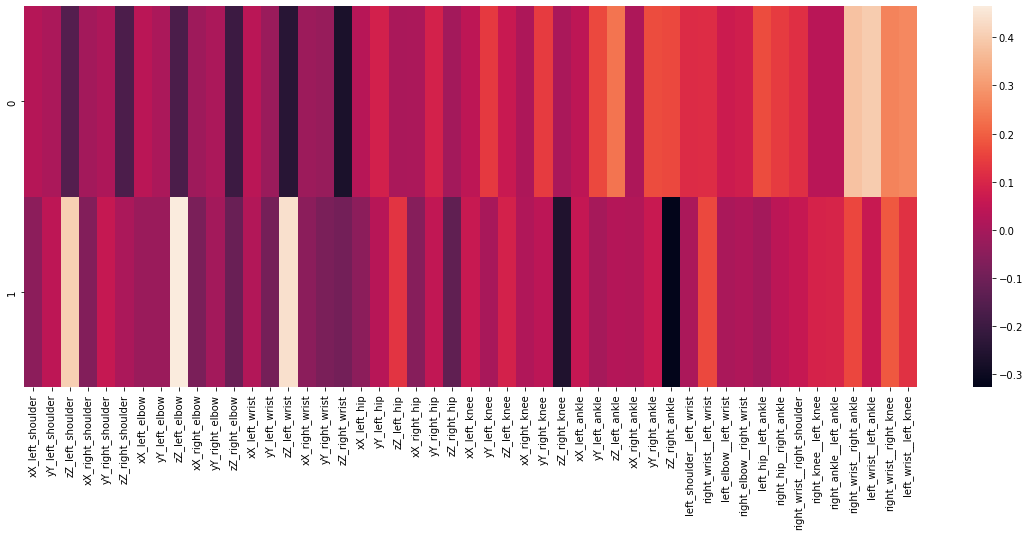

In [19]:
df_comp = pd.DataFrame(pca.components_,columns=df_new.drop("name",axis=1).columns)

plt.figure(figsize=(20,7))
sns.heatmap(df_comp)
plt.show()

### 2. T-distributed Stochastic Neighbor Embedding (t-SNE)


In [20]:
start = time.time()
from sklearn.manifold import TSNE
# With perplexity = 50 and without PCA as pre-processing 
tsne = TSNE(n_components=2, verbose=1, perplexity=50, 
            n_iter=500, random_state=42).fit_transform(x) 

end_tsne_1 = (time.time() - start)
print('\nDuration: {} seconds'.format(end_tsne_1))
# Lower the KL divergence value, the better we have matched the true distribution with our approximation.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 224 samples in 0.000s...
[t-SNE] Computed neighbors for 224 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 224 / 224
[t-SNE] Mean sigma: 0.646434
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.163017
[t-SNE] KL divergence after 500 iterations: 0.563987

Duration: 0.33781003952026367 seconds


No handles with labels found to put in legend.


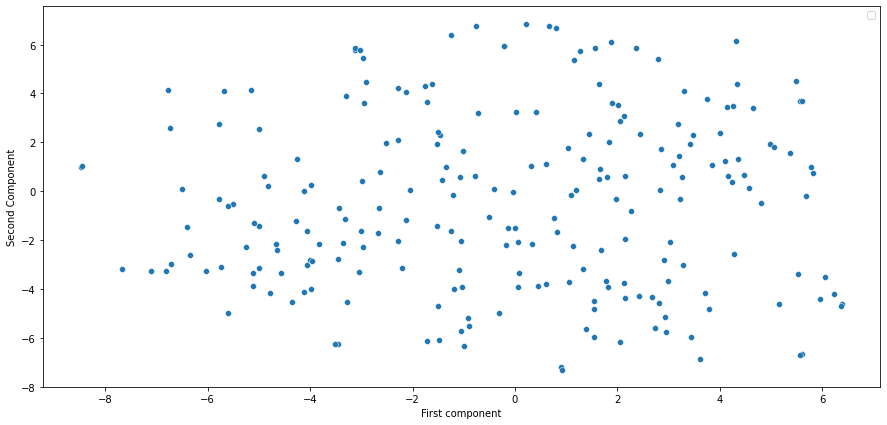

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(tsne[:,0],tsne[:,1])
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

In [22]:
# With perplexity = 50 and PCA as pre-processing 
start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, 
            n_iter=500, random_state=42).fit_transform(X_pca) 

end_tsne_2 = (time.time() - start)
print('\nDuration: {} seconds'.format(end_tsne_2))

# Lower the KL divergence value, the better we have matched the true distribution with our approximation.
# Similar labels are clustered together, even though there are still data points on top of each other

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 224 samples in 0.000s...
[t-SNE] Computed neighbors for 224 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 224 / 224
[t-SNE] Mean sigma: 0.339811
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.013557
[t-SNE] KL divergence after 500 iterations: 0.245661

Duration: 0.3463428020477295 seconds


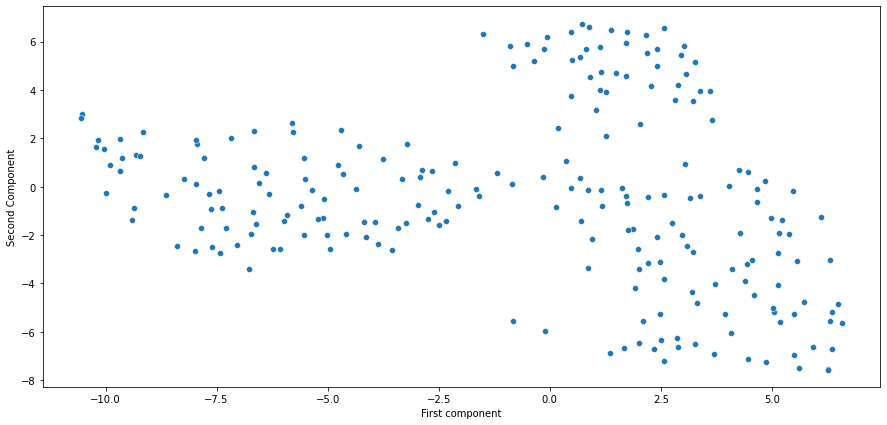

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(tsne[:,0],tsne[:,1])
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.show()

### 3. Uniform Manifold Approximation and Projection (UMAP)

In [24]:
start = time.time()
import umap
embedding = umap.UMAP(n_neighbors=30, n_components=2, metric='jaccard',
                      n_epochs= 500, verbose=1, random_state=42).fit_transform(x)

end_umap_1 = (time.time() - start)
print('\nDuration: {} seconds'.format(end_umap_1))

Init Plugin
Init Graph Optimizer
Init Kernel
UMAP(angular_rp_forest=True, metric='jaccard', n_epochs=500, n_neighbors=30, random_state=42, verbose=1)
Sun Dec 12 23:49:09 2021 Construct fuzzy simplicial set
Sun Dec 12 23:49:09 2021 Finding Nearest Neighbors


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Sun Dec 12 23:49:10 2021 Finished Nearest Neighbor Search
Sun Dec 12 23:49:11 2021 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Dec 12 23:49:13 2021 Finished embedding

Duration: 6.952193021774292 seconds


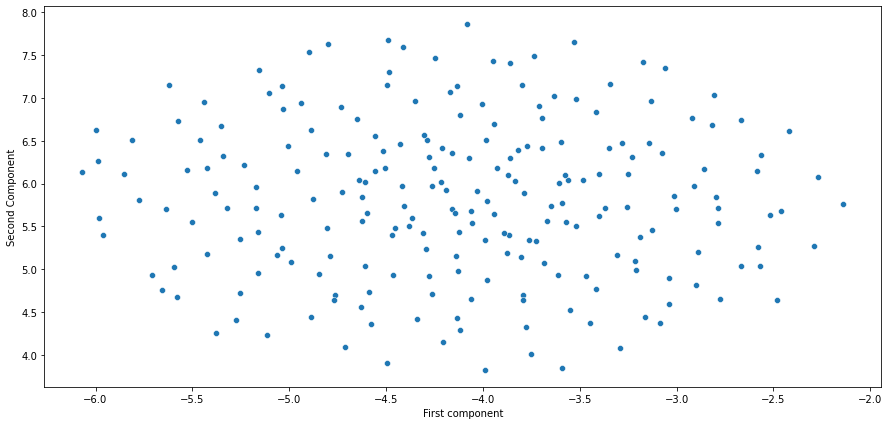

In [25]:
plt.figure(figsize=(15,7))
sns.scatterplot(embedding[:,0],embedding[:,1])
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.show()

In [26]:
# Low values of n_neighbours forces UMAP to focus on very local structures 
# while the higher values will make UMAP focus on the larger neighbourhoods.

start = time.time()
import umap
embedding = umap.UMAP(n_neighbors=250, n_components=2, metric='jaccard',
                      n_epochs= 500, verbose=1, random_state=42).fit_transform(x)

end_umap_2 = (time.time() - start)
print('\nDuration: {} seconds'.format(end_umap_2))

UMAP(angular_rp_forest=True, metric='jaccard', n_epochs=500, n_neighbors=250, random_state=42, verbose=1)
Sun Dec 12 23:49:13 2021 Construct fuzzy simplicial set
Sun Dec 12 23:49:13 2021 Finding Nearest Neighbors
Sun Dec 12 23:49:13 2021 Finished Nearest Neighbor Search
Sun Dec 12 23:49:13 2021 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Dec 12 23:49:20 2021 Finished embedding

Duration: 6.910551071166992 seconds


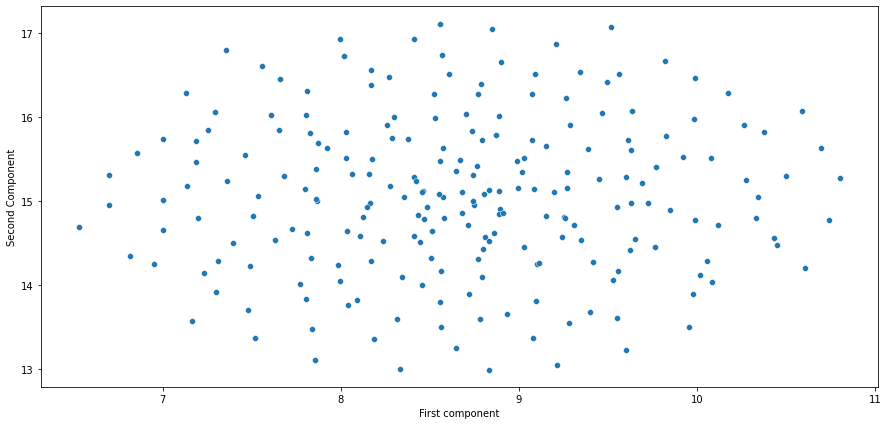

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(embedding[:,0],embedding[:,1])
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.show()

In [28]:
np.version.version

'1.20.0'

In [29]:
data = {'DR_Method':['PCA', 'TSNE', 'TSNE_PCA', 'UMAP_30', 'UMAP_250'],
        'Time_Taken':[end_pca, end_tsne_1, end_tsne_2, end_umap_1, end_umap_2]}

df_time = pd.DataFrame(data)
df_time.sort_values(by = "Time_Taken", ignore_index=True)

,DR_Method,Time_Taken
0,PCA,0.069318
1,TSNE,0.337810
2,TSNE_PCA,0.346343
3,UMAP_250,6.910551
4,UMAP_30,6.952193


## Clustering Algorithm
1. Partitional Clustering (K-means)
2. Density Based Clustering (DBSCAN)
3. Hierarchical Based Clustering (Ward)
4. Soft Clustering (Fuzzy)

### 1. Partitional Clustering (K-means)

In [30]:
############################## KMeans ##############################
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
c1 = kmeans.fit_predict(x)
c2 = kmeans.fit_predict(X_pca)

In [31]:
df_pca["k_means"] = c2
df_pca.head()

,principal_component_1,principal_component_2,name,k_means
0,-0.945675,0.148412,Seated Jackknife,2
1,-0.171835,0.055688,hanging leg raises_4,2
2,0.264902,-0.141411,lat pull-downs (3),0
3,-0.356759,-0.301250,The Deadlift,1
4,-0.167781,0.046369,seated rows (4),2


In [32]:
df_new["k_means"] = c1
df_new[df_new.columns[49:]].head()

,name,k_means
0,Seated Jackknife,2
1,hanging leg raises_4,1
2,lat pull-downs (3),2
3,The Deadlift,1
4,seated rows (4),2


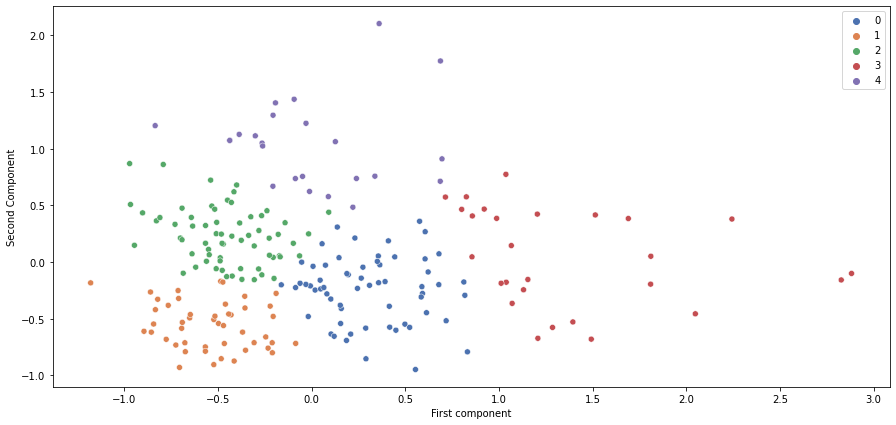

In [33]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_pca["principal_component_1"],df_pca["principal_component_2"],hue = df_pca["k_means"],
               palette="deep")
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

### 2. Density Based Clustering (DBSCAN)

In [34]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [35]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 17


In [36]:
df_pca["dbscan"] = labels
df_pca.head()

,principal_component_1,principal_component_2,name,k_means,dbscan
0,-0.945675,0.148412,Seated Jackknife,2,0
1,-0.171835,0.055688,hanging leg raises_4,2,0
2,0.264902,-0.141411,lat pull-downs (3),0,0
3,-0.356759,-0.301250,The Deadlift,1,0
4,-0.167781,0.046369,seated rows (4),2,0


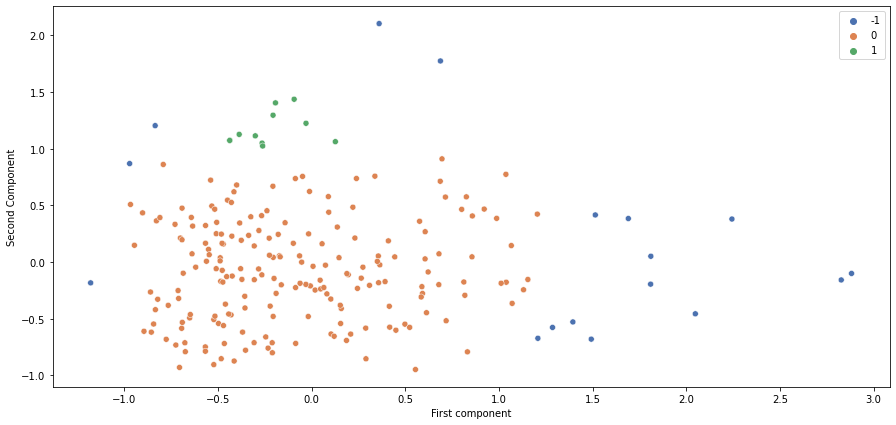

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_pca["principal_component_1"],df_pca["principal_component_2"],hue = df_pca["dbscan"],
               palette="deep")
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

In [38]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 224


In [39]:
df_new["dbscan"] = labels
df_new[df_new.columns[49:]].head()

,name,k_means,dbscan
0,Seated Jackknife,2,-1
1,hanging leg raises_4,1,-1
2,lat pull-downs (3),2,-1
3,The Deadlift,1,-1
4,seated rows (4),2,-1


### 3. Hierarchical Based Clustering (Ward)

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X_pca)
df_pca["Ward"] = clustering.labels_

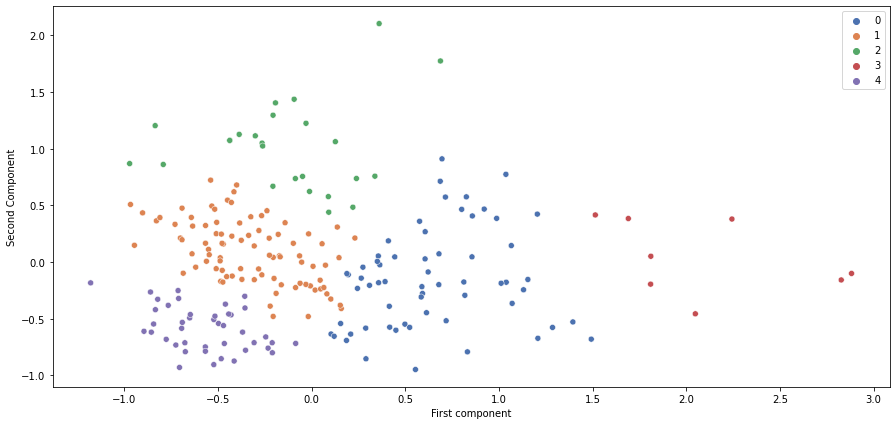

In [42]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_pca["principal_component_1"],df_pca["principal_component_2"],hue =df_pca["Ward"],
               palette="deep")
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

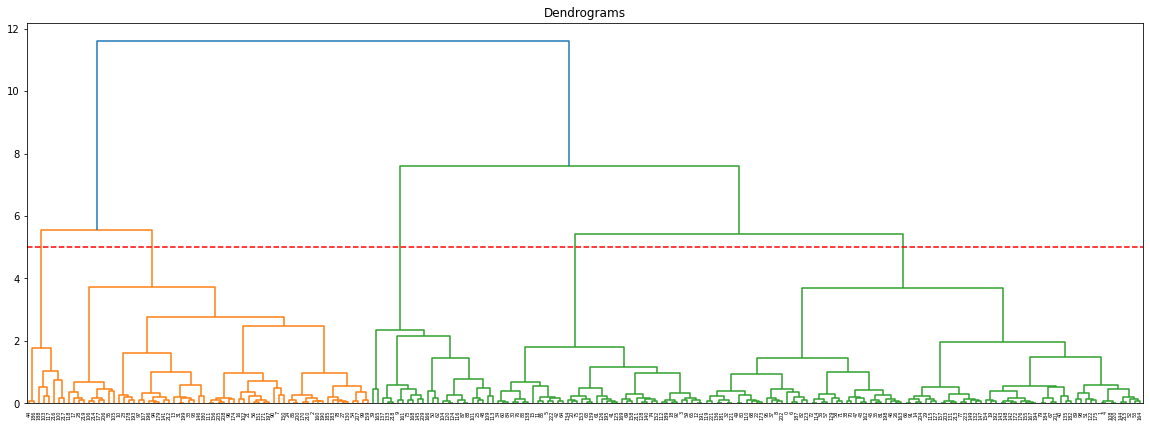

In [43]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_pca[["principal_component_1","principal_component_2"]], method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

In [44]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(x)
df_new["Ward"] = clustering.labels_
df_new[df_new.columns[49:]].head()

,name,k_means,dbscan,Ward
0,Seated Jackknife,2,-1,3
1,hanging leg raises_4,1,-1,0
2,lat pull-downs (3),2,-1,0
3,The Deadlift,1,-1,3
4,seated rows (4),2,-1,0


### 4. Soft Clustering (Fuzzy)

In [45]:
from fcmeans import FCM
fcm = FCM(n_clusters=5)
fcm.fit(X_pca)
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_pca)
df_pca["Fuzzy"] = fcm_labels
df_pca.head()

,principal_component_1,principal_component_2,name,k_means,dbscan,Ward,Fuzzy
0,-0.945675,0.148412,Seated Jackknife,2,0,1,2
1,-0.171835,0.055688,hanging leg raises_4,2,0,1,2
2,0.264902,-0.141411,lat pull-downs (3),0,0,0,1
3,-0.356759,-0.301250,The Deadlift,1,0,4,4
4,-0.167781,0.046369,seated rows (4),2,0,1,2


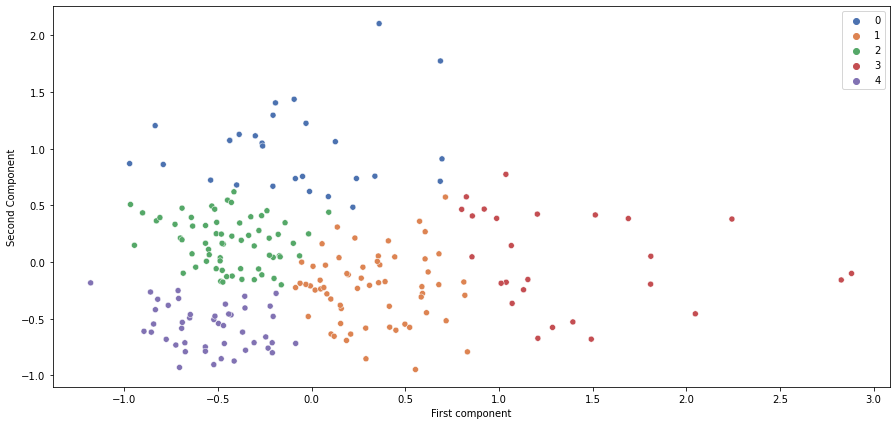

In [46]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_pca["principal_component_1"],df_pca["principal_component_2"],hue =df_pca["Fuzzy"],
               palette="deep")
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

In [47]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [48]:
df_pca

,principal_component_1,principal_component_2,name,k_means,dbscan,Ward,Fuzzy
0,-0.945675,0.148412,Seated Jackknife,2,0,1,2
1,-0.171835,0.055688,hanging leg raises_4,2,0,1,2
2,0.264902,-0.141411,lat pull-downs (3),0,0,0,1
3,-0.356759,-0.301250,The Deadlift,1,0,4,4
4,-0.167781,0.046369,seated rows (4),2,0,1,2
5,-0.821465,-0.327573,yt1s.com - Incline Bench Sit ups_480p,1,0,4,4
6,-0.828257,0.363881,Crunches - Tutorial Tuesday,2,0,1,2
7,0.290045,-0.852677,deadlifts (1),0,0,0,1
8,-0.635043,0.317704,hanging leg raises_7,2,0,1,2
9,0.337762,0.757813,bench presses,4,0,2,0


In [49]:
df_new[df_new.columns[49:]]

,name,k_means,dbscan,Ward
0,Seated Jackknife,2,-1,3
1,hanging leg raises_4,1,-1,0
2,lat pull-downs (3),2,-1,0
3,The Deadlift,1,-1,3
4,seated rows (4),2,-1,0
5,yt1s.com - Incline Bench Sit ups_480p,1,-1,0
6,Crunches - Tutorial Tuesday,2,-1,3
7,deadlifts (1),0,-1,0
8,hanging leg raises_7,3,-1,1
9,bench presses,2,-1,2
